#### This large dataset includes 96 DIA .raw files acquired from a complex proteomic standard composed of an E.coli protein background spiked-in with 8 different concentrations of 48 human proteins (UPS1 Sigma). These 8 samples were analyzed in triplicates on an Orbitrap mass spectrometer with 4 different DIA window schemes. 

In [1]:
%load_ext rpy2.ipython

C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  "The symbol '%s' is not in this R namespace/package." % name


In [2]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from pandas.api.types import CategoricalDtype


In [3]:
%%R

workdir = "../../datasets/LFQ-DIA/PXD026600/"
setwd(workdir)

### ECOLI proteins count

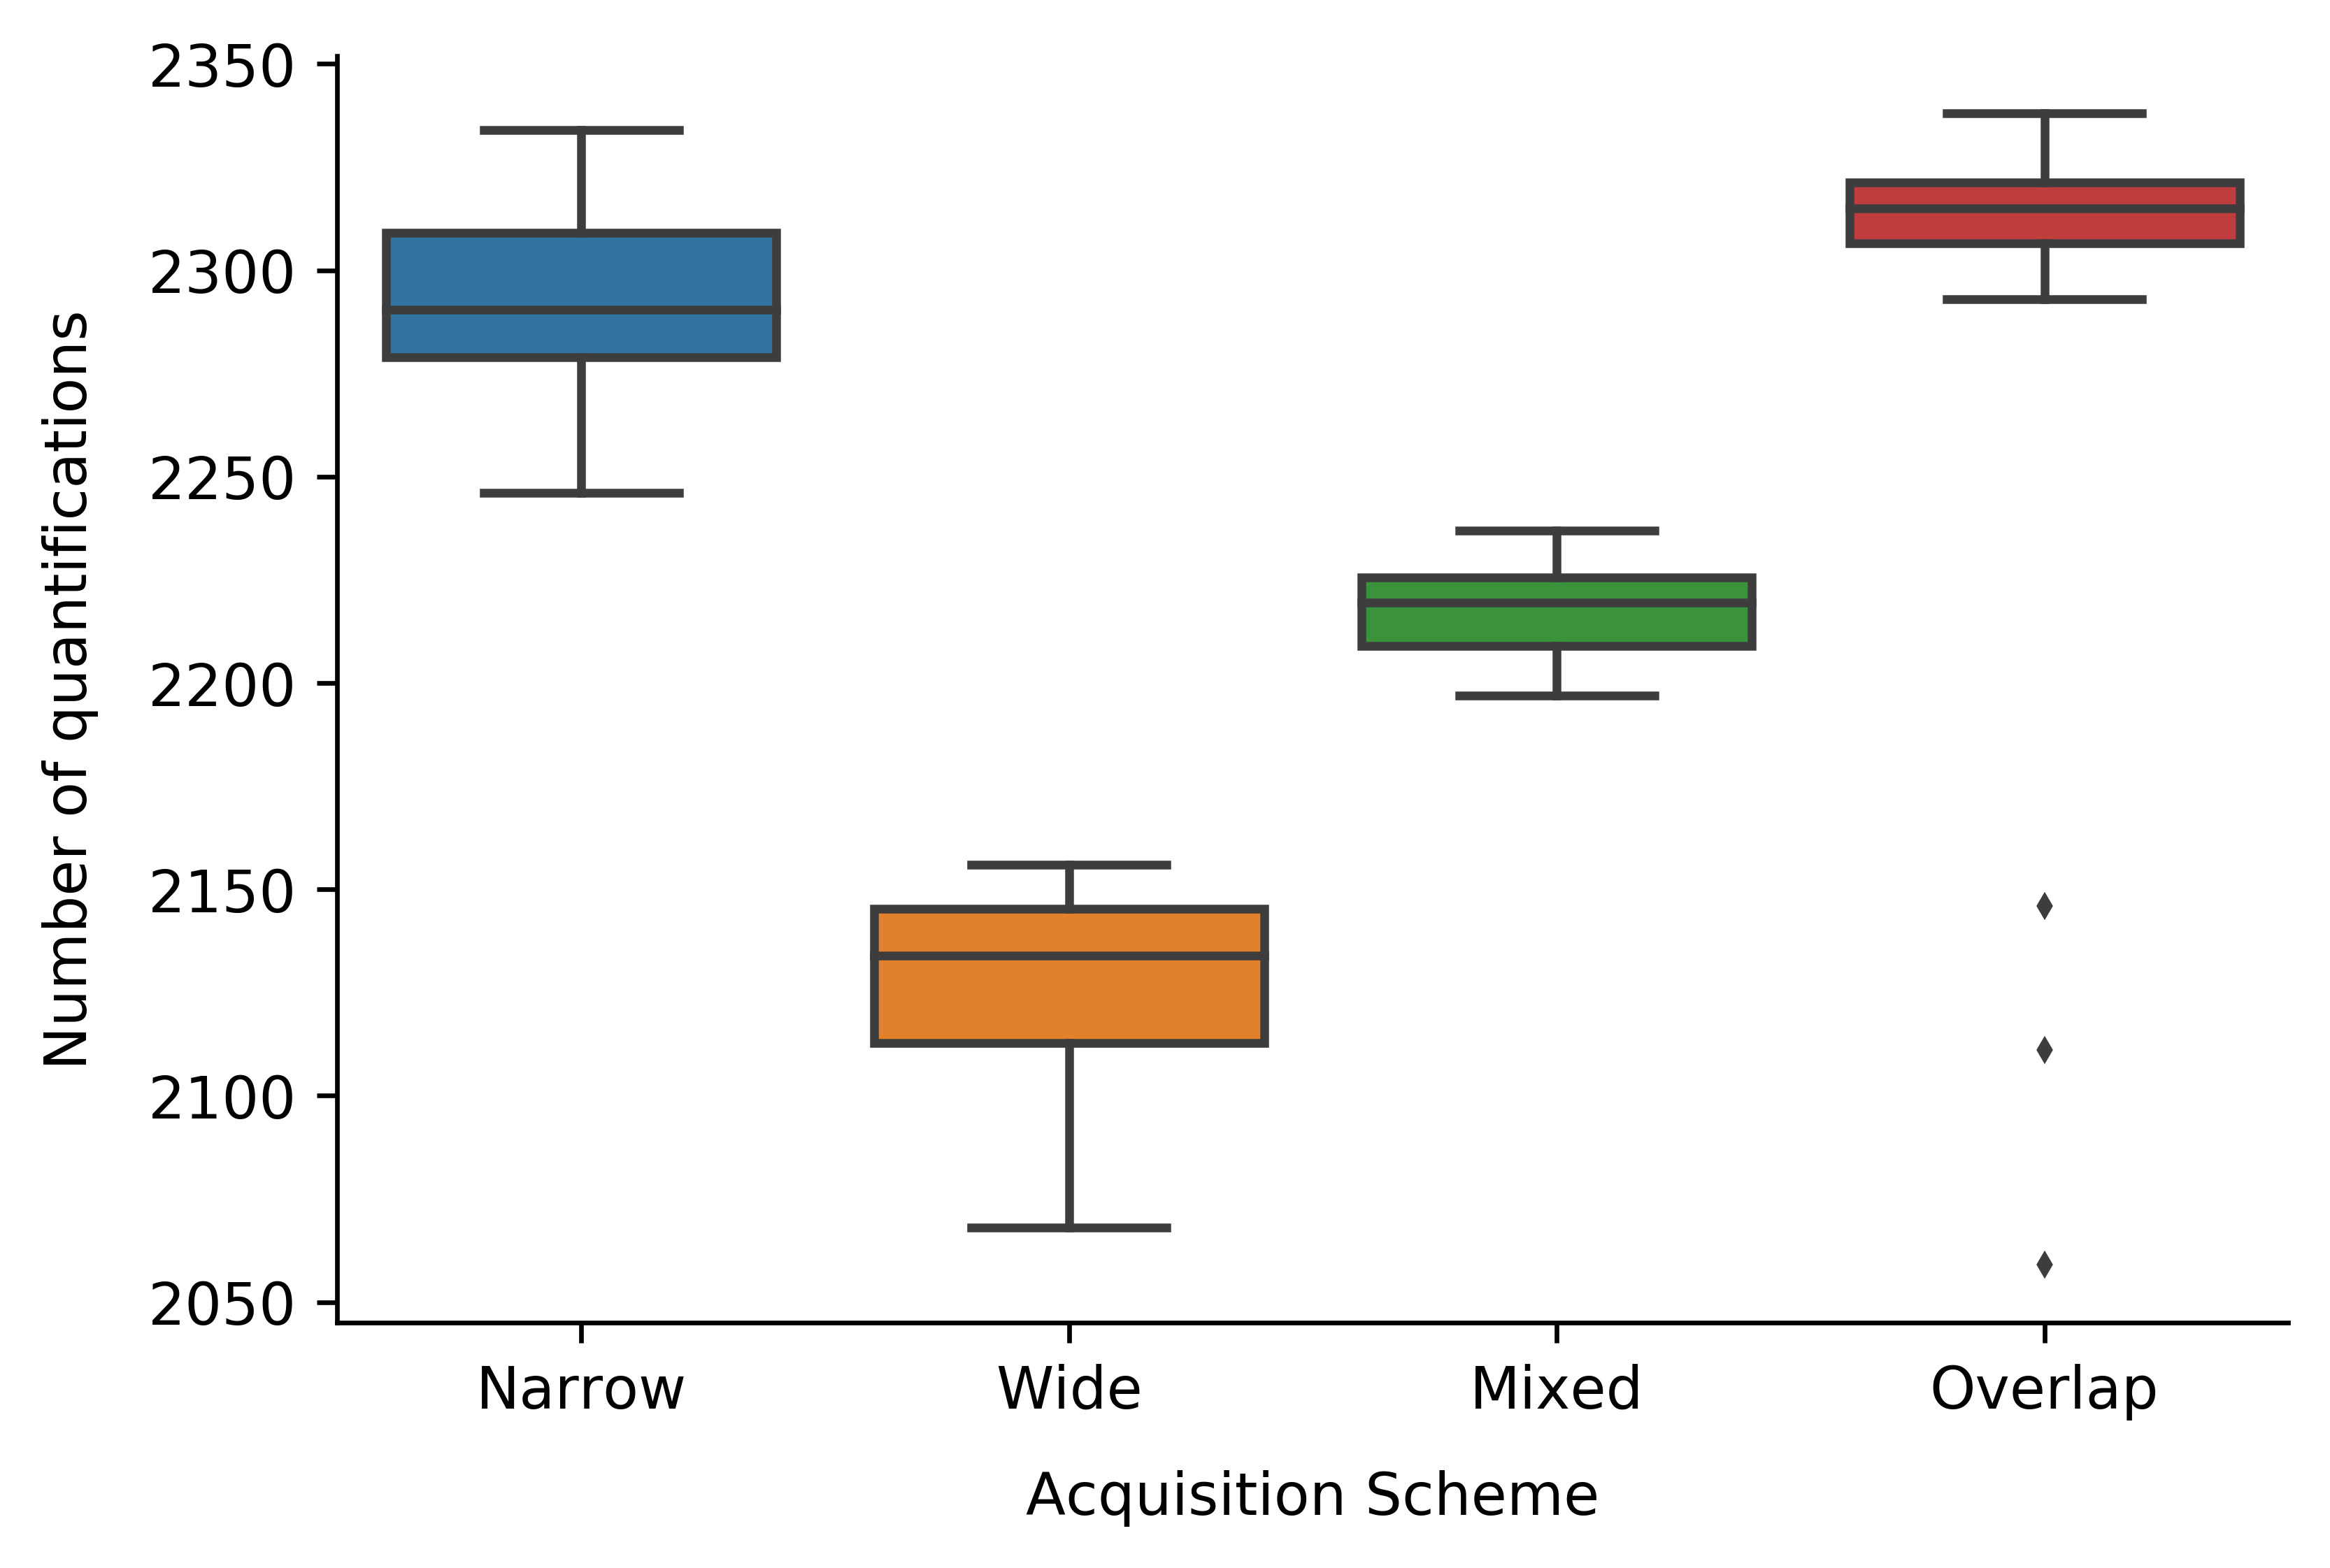

In [4]:
ecoli_boxplot_data = pd.DataFrame()
narrowdata = pd.read_csv("Narrow/PXD026600Narrow.sdrf_openms_design_msstats_in.csv")
narrowecoli = narrowdata[narrowdata["ProteinName"].str.contains("ECOLI")]
narrow_ecoli_count = narrowecoli.groupby('Reference', as_index=False)["ProteinName"].nunique()
ecoli_boxplot_data =  narrow_ecoli_count

widedata = pd.read_csv("Wide/PXD026600Wide.sdrf_openms_design_msstats_in.csv")
wide_ecoli = widedata[widedata["ProteinName"].str.contains("ECOLI")]
wide_ecoli_count = wide_ecoli.groupby('Reference', as_index=False)["ProteinName"].nunique()
ecoli_boxplot_data = pd.concat([ecoli_boxplot_data, wide_ecoli_count])

mixedata = pd.read_csv("Mixed/PXD026600Mixed.sdrf_openms_design_msstats_in.csv")
mixedecoli = mixedata[mixedata["ProteinName"].str.contains("ECOLI")]
mixed_ecoli_count = mixedecoli.groupby('Reference', as_index=False)["ProteinName"].nunique()
ecoli_boxplot_data = pd.concat([ecoli_boxplot_data, mixed_ecoli_count])

overlapdata = pd.read_csv("Overlap/PXD026600Overlap.sdrf_openms_design_msstats_in.csv")
overlapecoli = overlapdata[overlapdata["ProteinName"].str.contains("ECOLI")]
overlap_ecoli_count = overlapecoli.groupby('Reference', as_index=False)["ProteinName"].nunique()
ecoli_boxplot_data = pd.concat([ecoli_boxplot_data, overlap_ecoli_count])

ecoli_boxplot_data["Acquisition Scheme"] = ecoli_boxplot_data.apply(lambda x: x["Reference"].split("_")[1], axis=1)
ecoli_boxplot_data.rename(columns={'ProteinName':'Number of quantifications'},inplace=True) 

plt.figure(dpi=600)
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel("Acquisition Scheme",labelpad=8.5)
plt.ylabel("Number of quantifications",labelpad=8.5)

sb.boxplot(x=ecoli_boxplot_data["Acquisition Scheme"], y=ecoli_boxplot_data["Number of quantifications"],data=ecoli_boxplot_data, fliersize=2)

In [7]:
narrowups = narrowdata[-narrowdata["ProteinName"].str.contains("ECOLI")]
wide_ups = widedata[-widedata["ProteinName"].str.contains("ECOLI")]
mixedeups = mixedata[-mixedata["ProteinName"].str.contains("ECOLI")]
overlapups = overlapdata[-overlapdata["ProteinName"].str.contains("ECOLI")]

mixed_diann_report = pd.read_csv("Mixed/diann_report.tsv", sep="\t")
mixed_diann_report = mixed_diann_report[["Protein.Names", "Precursor.Quantity", "File.Name", "Protein.Group"]]
mixedeups = pd.merge(mixedeups, mixed_diann_report, left_on=["ProteinName", "Intensity", "Reference"], right_on=["Protein.Names", "Precursor.Quantity", "File.Name"], how="inner")
mixedeups.drop(labels=['ProteinName','File.Name', 'Precursor.Quantity', 'Protein.Names'], axis=1, inplace=True)
mixedeups.rename(columns={'Protein.Group': 'ProteinName'}, inplace=True)
mixed = pd.concat([mixedecoli, mixedeups])
mixed.to_csv("Mixed/PXD026600Mixed.sdrf_openms_design_msstats_in.csv", header=True, index=0)

narrow_diann_report = pd.read_csv("Narrow/diann_report.tsv", sep="\t")
narrow_diann_report = narrow_diann_report[["Protein.Names", "Precursor.Quantity", "File.Name", "Protein.Group"]]
narroweups = pd.merge(narrowups, narrow_diann_report, left_on=["ProteinName", "Intensity", "Reference"], right_on=["Protein.Names", "Precursor.Quantity", "File.Name"], how="inner")
narroweups.drop(labels=['ProteinName','File.Name', 'Precursor.Quantity', 'Protein.Names'], axis=1, inplace=True)
narroweups.rename(columns={'Protein.Group': 'ProteinName'}, inplace=True)
narrow = pd.concat([narrowecoli, narroweups])
narrow.to_csv("Narrow/PXD026600Narrow.sdrf_openms_design_msstats_in.csv", header=True, index=0)

wide_diann_report = pd.read_csv("Wide/diann_report.tsv", sep="\t")
wide_diann_report = wide_diann_report[["Protein.Names", "Precursor.Quantity", "File.Name", "Protein.Group"]]
wide_ups = pd.merge(wide_ups, wide_diann_report, left_on=["ProteinName", "Intensity", "Reference"], right_on=["Protein.Names", "Precursor.Quantity", "File.Name"], how="inner")
wide_ups.drop(labels=['ProteinName','File.Name', 'Precursor.Quantity', 'Protein.Names'], axis=1, inplace=True)
wide_ups.rename(columns={'Protein.Group': 'ProteinName'}, inplace=True)
wide = pd.concat([wide_ecoli, wide_ups])
wide.to_csv("Wide/PXD026600Wide.sdrf_openms_design_msstats_in.csv", header=True, index=0)

overlap_diann_report = pd.read_csv("Overlap/diann_report.tsv", sep="\t")
overlap_diann_report = overlap_diann_report[["Protein.Names", "Precursor.Quantity", "File.Name", "Protein.Group"]]
overlapups = pd.merge(overlapups, overlap_diann_report, left_on=["ProteinName", "Intensity", "Reference"], right_on=["Protein.Names", "Precursor.Quantity", "File.Name"], how="inner")
overlapups.drop(labels=['ProteinName','File.Name', 'Precursor.Quantity', 'Protein.Names'], axis=1, inplace=True)
overlapups.rename(columns={'Protein.Group': 'ProteinName'}, inplace=True)
overlap = pd.concat([overlapecoli, overlapups])
overlap.to_csv("Overlap/PXD026600Overlap.sdrf_openms_design_msstats_in.csv", header=True, index=0)

### UPS1 Proteins Count

   Condition  Number of quantifications Acquisition Scheme
0   0.1 fmol                         18             Narrow
1  0.25 fmol                         32             Narrow
2     1 fmol                         44             Narrow
3    10 fmol                         48             Narrow
4   2.5 fmol                         47             Narrow
5    25 fmol                         48             Narrow
6     5 fmol                         48             Narrow
7    50 fmol                         48             Narrow
0   0.1 fmol                         17               Wide
1  0.25 fmol                         23               Wide
2     1 fmol                         40               Wide
3    10 fmol                         48               Wide
4   2.5 fmol                         46               Wide
5    25 fmol                         48               Wide
6     5 fmol                         48               Wide
7    50 fmol                         48               Wi

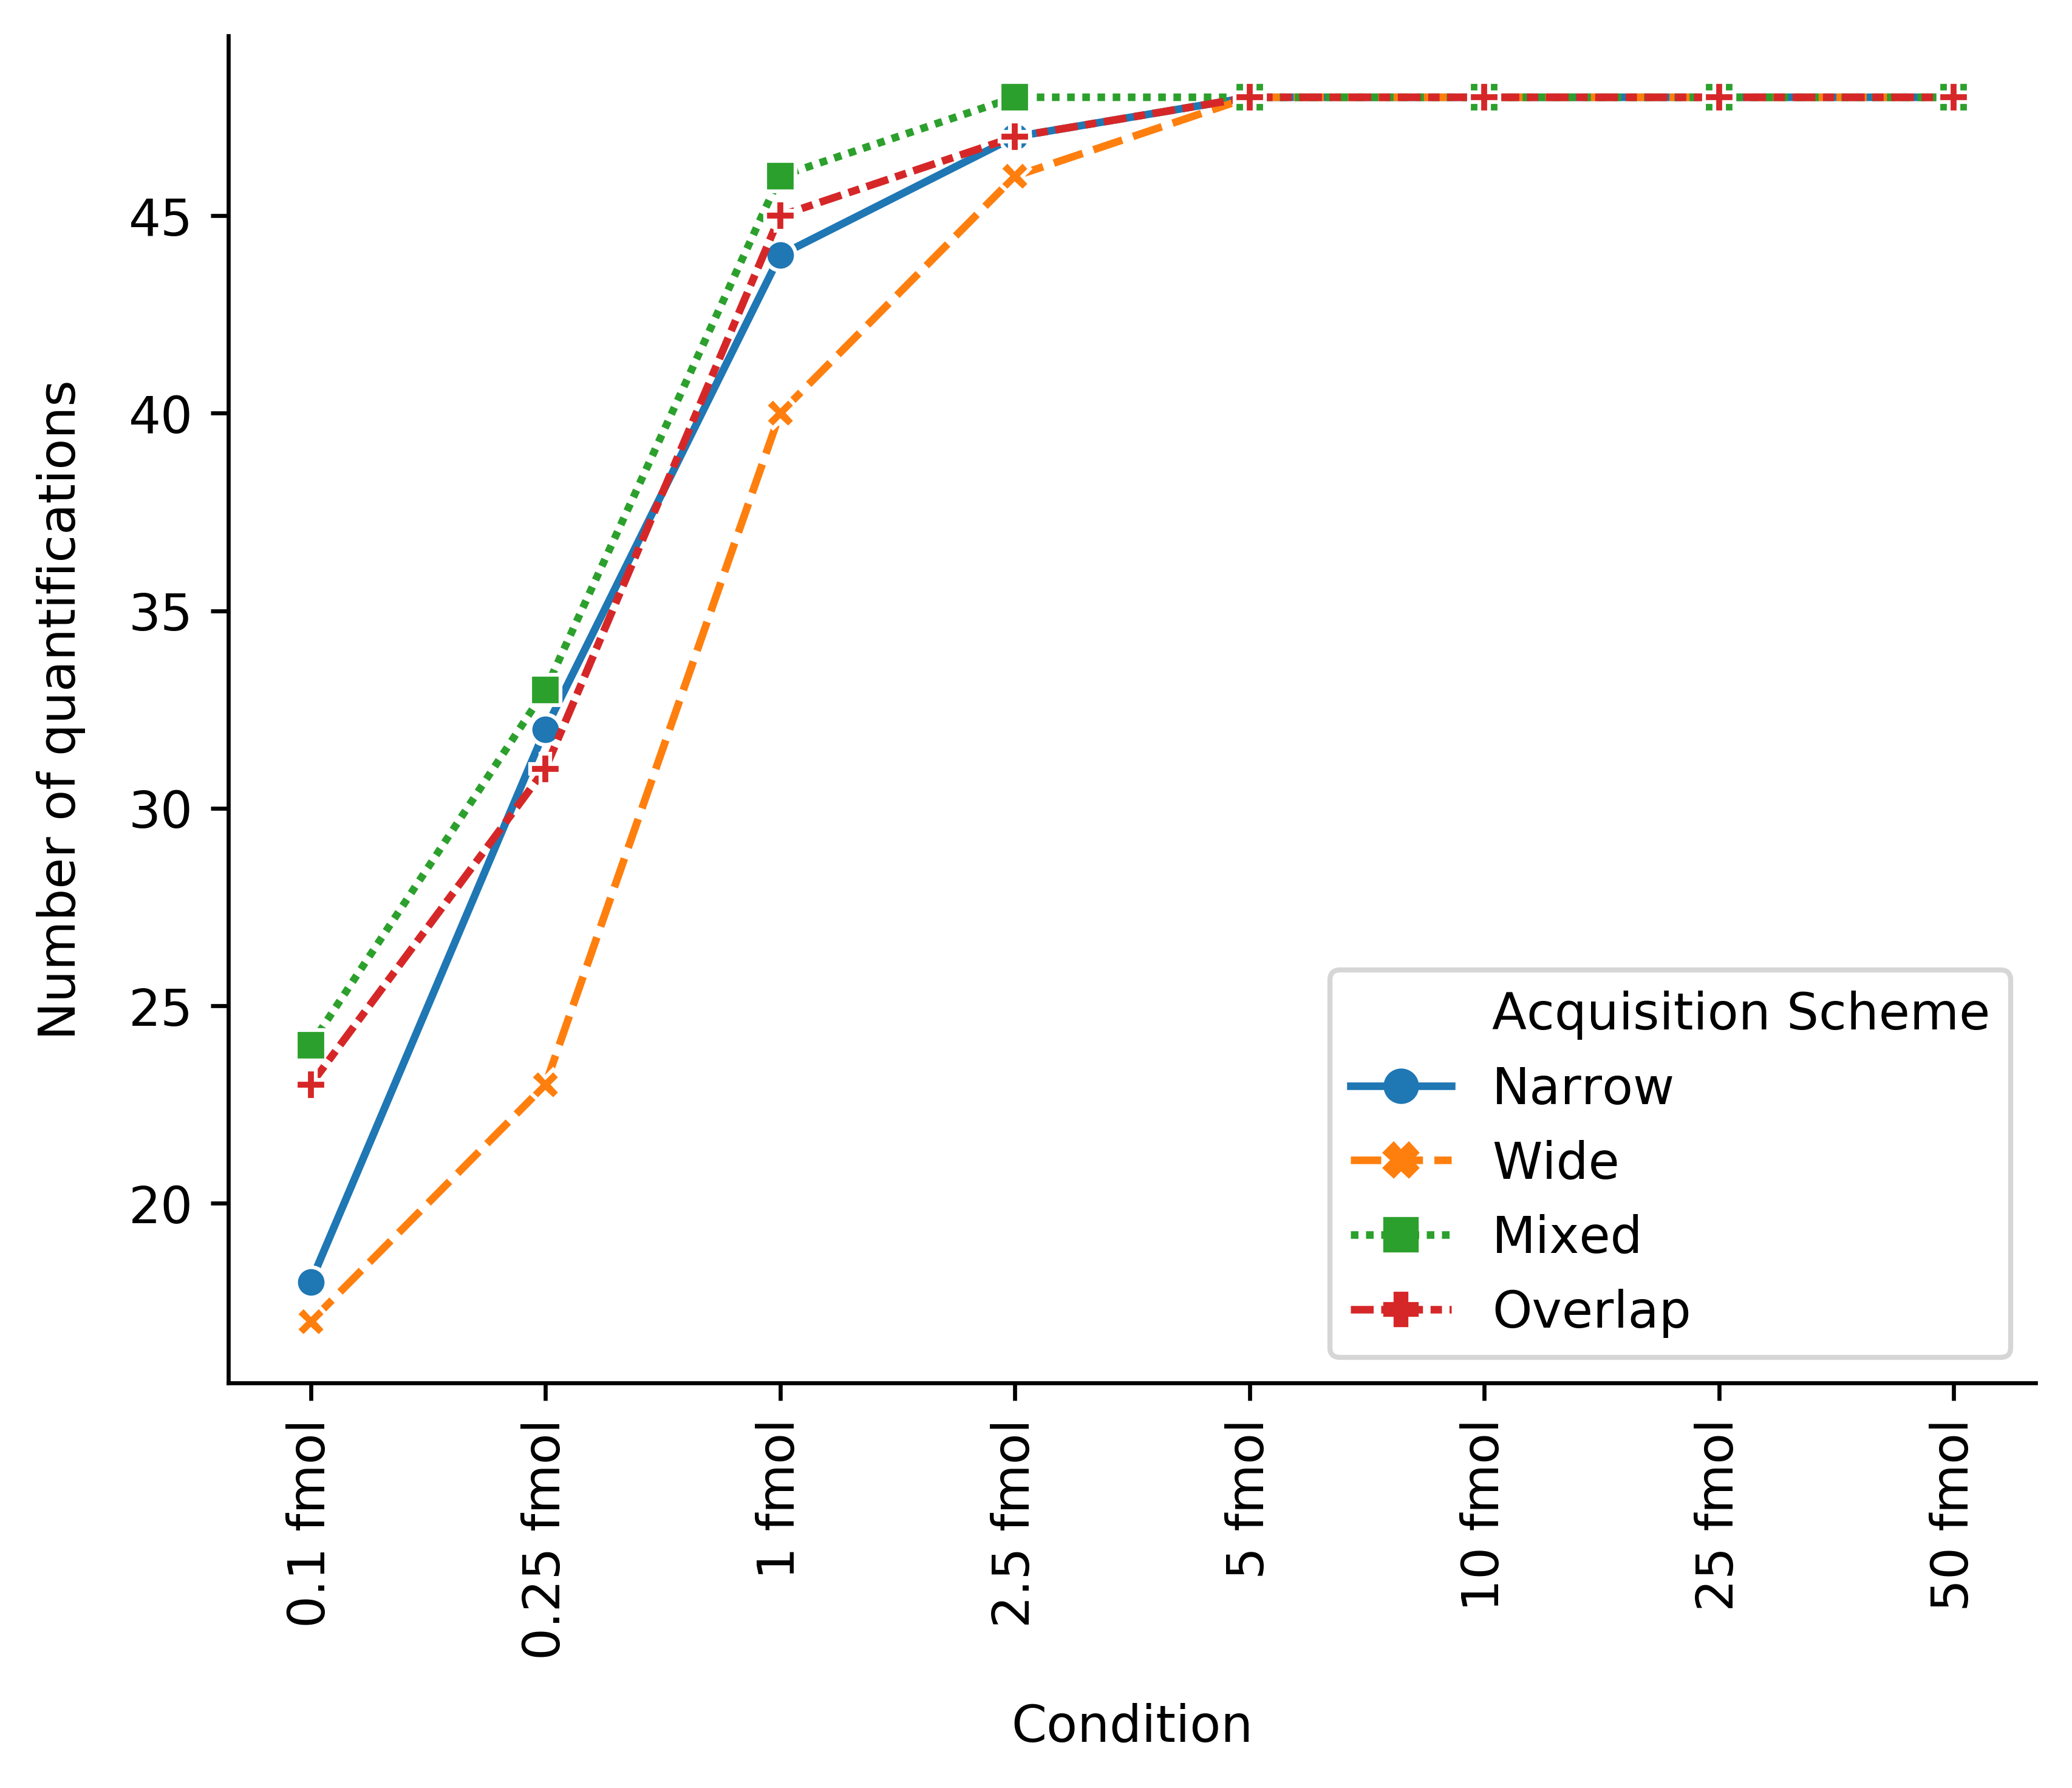

In [98]:
ups_line_data = pd.DataFrame()

narrowdata = pd.read_csv("Narrow/PXD026600Narrow.sdrf_openms_design_msstats_in.csv")
widedata = pd.read_csv("Wide/PXD026600Wide.sdrf_openms_design_msstats_in.csv")
mixedata = pd.read_csv("Mixed/PXD026600Mixed.sdrf_openms_design_msstats_in.csv")
overlapdata = pd.read_csv("Overlap/PXD026600Overlap.sdrf_openms_design_msstats_in.csv")

narrowups = narrowdata[-narrowdata["ProteinName"].str.contains("ECOLI")]
ups_line_data = narrowups.groupby(['Condition'], as_index=False)["ProteinName"].nunique()


wide_ups = widedata[-widedata["ProteinName"].str.contains("ECOLI")]
wide_ups_count = wide_ups.groupby('Condition', as_index=False)["ProteinName"].nunique()
ups_line_data = pd.concat([ups_line_data, wide_ups_count])

mixedeups = mixedata[-mixedata["ProteinName"].str.contains("ECOLI")]
mixed_ups_count = mixedeups.groupby('Condition', as_index=False)["ProteinName"].nunique()
ups_line_data = pd.concat([ups_line_data, mixed_ups_count])

overlapups = overlapdata[-overlapdata["ProteinName"].str.contains("ECOLI")]
overlap_ups_count = overlapups.groupby('Condition', as_index=False)["ProteinName"].nunique()
ups_line_data = pd.concat([ups_line_data, overlap_ups_count])

ups_line_data["Acquisition Scheme"] = ups_line_data.apply(lambda x: x["Condition"].split("|")[0], axis=1)
ups_line_data["Condition"] = ups_line_data.apply(lambda x: x["Condition"].split("|")[1].replace("CT=Mixture;CN=UPS1;QY=", ""), axis=1)
ups_line_data.rename(columns={'ProteinName':'Number of quantifications'},inplace=True)

cat_size_order = CategoricalDtype(
    ['0.1 fmol', '0.25 fmol', '1 fmol', '2.5 fmol', '5 fmol', '10 fmol', '25 fmol', '50 fmol'], 
    ordered=True
)
ups_line_data['Condition'] = ups_line_data['Condition'].astype(cat_size_order)

print(ups_line_data)
plt.figure(dpi=600)
plt.style.use('default')
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel("Condition",labelpad=8.5)
plt.ylabel("Number of quantifications",labelpad=8.5)

plt.xticks(rotation=90)
sb.lineplot(x="Condition", y="Number of quantifications", hue="Acquisition Scheme",style="Acquisition Scheme", markers=True,data=ups_line_data)

### Narrow

In [9]:
%%R -w 800 -h 600

library('MSstats', warn.conflicts = F, quietly = T, verbose = F)
library("dplyr")


protein_expression = 'narrow_protein_expression.csv'

raw.om <- read.csv('Narrow/PXD026600Narrow.sdrf_openms_design_msstats_in.csv', header = TRUE, sep = ',')
raw.om <- raw.om[!grepl("DECOY", raw.om$ProteinName),]

raw.om$Condition <- sub("Narrow\\|CT=Mixture;CN=UPS1;QY=", "", raw.om$Condition)

raw.om <- OpenMStoMSstatsFormat(raw.om)
# If run dataProcess() occuring an error message, please change "summaryMethod = 'TMP'" to "summaryMethod = 'linear'"
quantms.proposed <- MSstats::dataProcess(raw = raw.om,
                                           normalization = 'equalizeMedians',
                                           summaryMethod = 'TMP',
                                           censoredInt = "NA",
                                           MBimpute = TRUE)

# Write the expression protein log values into the expression csv 
head(quantms.proposed$ProteinLevelData)
Protein.Expression <- quantms.proposed$ProteinLevelData[, c('Protein', 'LogIntensities', 'GROUP')]
# head(Protein.Expression)
# write.csv(Protein.Expression, file=protein_expression, row.names=FALSE)

From cffi callback <function _consolewrite_ex at 0x000002533F4B8828>:
Traceback (most recent call last):
  File "C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\rpy2\rinterface_lib\callbacks.py", line 132, in _consolewrite_ex
    s = conversion._cchar_to_str_with_maxlen(buf, n, _CCHAR_ENCODING)
  File "C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\rpy2\rinterface_lib\conversion.py", line 133, in _cchar_to_str_with_maxlen
    s = ffi.string(c, maxlen).decode(encoding)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd4 in position 1: invalid continuation byte
R[write to console]: The following objects are masked from 'package:stats':

    filter, lag


R[write to console]: The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




INFO  [2022-08-15 12:03:41] ** Raw data from OpenMS imported successfully.
INFO  [2022-08-15 12:03:42] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-08-15 12:03:42] ** Using annotation extracted from quantification data.
INFO  [2022-08-15 12:03:42] ** Run labels were standardized to remove symbols such as '.' or '%'.
INFO  [2022-08-15 12:03:42] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge, FragmentIon, ProductCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements across runs will be removed.
INFO  [2022-08-15 12:03:43] ** Features with all missing measurements across runs are removed.
INFO  [2022-08-15 12:03:43] ** Shared peptides are removed.
INFO  [2022-08-15 12:03:44] ** Multiple measurements in a feature and a run are summarized by summaryforMultipleRows: max
INFO  [2022-08-15 12:03:44] ** Features with one or two meas

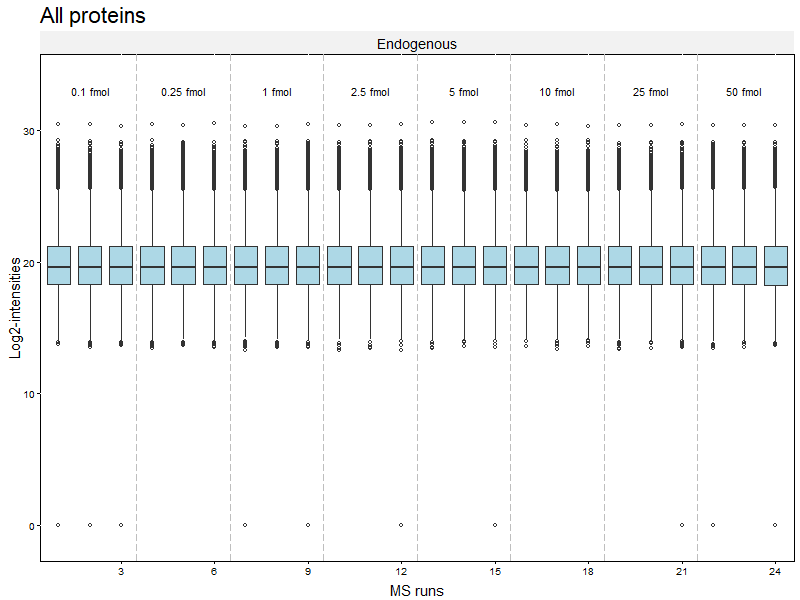

In [29]:
%%R -w 800 -h 600
ordered.item <- c("0.1 fmol","0.25 fmol","1 fmol","2.5 fmol", "5 fmol", "10 fmol", "25 fmol", "50 fmol")
ordered.item <- factor(1:length(ordered.item),labels = ordered.item)
quantms.proposed$ProteinLevelData$GROUP<-factor(quantms.proposed$ProteinLevelData$GROUP,levels = levels(ordered.item))
quantms.proposed$FeatureLevelData$GROUP<-factor(quantms.proposed$FeatureLevelData$GROUP,levels = levels(ordered.item))

dataProcessPlots(data = quantms.proposed, type="QCPlot",which.Protein="allonly",width=10, height=5, address=FALSE)

In [22]:
%%R

dataProcessPlots(data=quantms.proposed,type="ProfilePlot")

  |======================================================================| 100%
  |======================================================================| 100%


  |==================================                                    |  49%


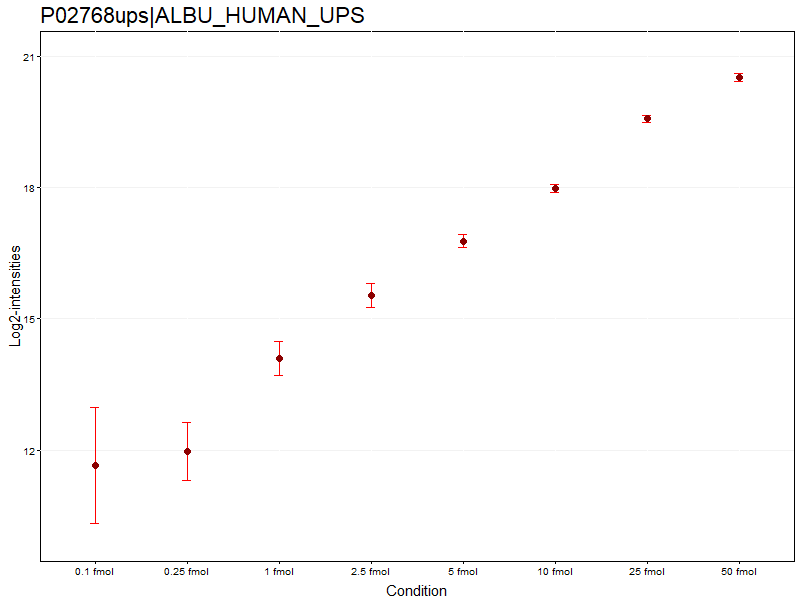

In [34]:
%%R -w 800 -h 600

tmp <- levels(quantms.proposed$ProcessedData$PROTEIN)
selector <- append("P02768ups|ALBU_HUMAN_UPS", tmp, 1)
dataProcessPlots(data = quantms.proposed, type="ConditionPlot",which.Protein=selector,width=10, height=5, address=FALSE)

In [36]:
%%R

ac_groups = levels(quantms.proposed$FeatureLevelData$GROUP)
groups = levels(quantms.proposed$ProteinLevelData$GROUP)
print(groups)
comparison_matrix = c(0,0,0,0,0,0,-1,0,0,0,0,0,-1,0,0,0,0,-1,0,0,0,-1,0,0,-1,0,-1,-1,
                      0,0,0,0,0,-1,0,0,0,0,0,-1,0,0,0,0,-1,0,0,0,-1,0,0,-1,0,-1,0,1,
                      0,0,0,0,-1,0,0,0,0,0,-1,0,0,0,0,-1,0,0,0,-1,0,0,-1,0,0,1,1,0,
                      0,0,0,-1,0,0,0,0,0,-1,0,0,0,0,-1,0,0,0,-1,0,0,0,1,1,1,0,0,0,
                      0,0,-1,0,0,0,0,0,-1,0,0,0,0,-1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,
                      0,-1,0,0,0,0,0,-1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,
                      -1,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                      1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
                     )

print(length(comparison_matrix))
comparison <- matrix(comparison_matrix, nrow=28)
colnames(comparison) <- groups[order(as.numeric(groups))]
row.names(comparison) <- c("50vs25", "50vs10", "50vs5","50vs2.5","50vs1", "50vs0.25", "50vs0.1","25vs10", 
                          "25vs5", "25vs2.5", "25vs1", "25vs0.25", "25vs0.1", "10vs5", "10vs2.5",
                          "10vs1", "10vs0.25", "10vs0.1", "5vs2.5", "5vs1", "5vs0.25",
                          "5vs0.1", "2.5vs1", "2.5vs0.25", "2.5vs0.1", "1vs0.25",
                          "1vs0.1", "0.25vs0.1")

[1] "0.1 fmol"  "0.25 fmol" "1 fmol"    "2.5 fmol"  "5 fmol"    "10 fmol"  
[7] "25 fmol"   "50 fmol"  
[1] 224


In [37]:
%%R

ResultComparison <- groupComparison(contrast.matrix=comparison, data=quantms.proposed)
head(ResultComparison$ComparisonResult)
write.csv(ResultComparison$ComparisonResult, 'Narrow/narrow_comparison_res.csv', row.names=FALSE,col.names=TRUE,sep=",")

INFO  [2022-08-15 15:05:45]  == Start to test and get inference in whole plot ...
  |======================================================================| 100%
INFO  [2022-08-15 15:06:17]  == Comparisons for all proteins are done.


### Wide

In [38]:
%%R

raw.om <- read.csv('Wide/PXD026600Wide.sdrf_openms_design_msstats_in.csv', header = TRUE, sep = ',')
raw.om$Condition <- sub("Wide\\|CT=Mixture;CN=UPS1;QY=", "", raw.om$Condition)

raw.om <- OpenMStoMSstatsFormat(raw.om)
# If run dataProcess() occuring an error message, please change "summaryMethod = 'TMP'" to "summaryMethod = 'linear'"
quantms.proposed <- MSstats::dataProcess(raw = raw.om,
                                           normalization = 'equalizeMedians',
                                           summaryMethod = 'TMP',
                                           censoredInt = "NA",
                                           MBimpute = TRUE)

# Write the expression protein log values into the expression csv 
head(quantms.proposed$ProteinLevelData)
Protein.Expression <- quantms.proposed$ProteinLevelData[, c('Protein', 'LogIntensities', 'GROUP')]

INFO  [2022-08-15 15:06:50] ** Raw data from OpenMS imported successfully.
INFO  [2022-08-15 15:06:51] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-08-15 15:06:51] ** Using annotation extracted from quantification data.
INFO  [2022-08-15 15:06:51] ** Run labels were standardized to remove symbols such as '.' or '%'.
INFO  [2022-08-15 15:06:51] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge, FragmentIon, ProductCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements across runs will be removed.
INFO  [2022-08-15 15:06:51] ** Features with all missing measurements across runs are removed.
INFO  [2022-08-15 15:06:52] ** Shared peptides are removed.
INFO  [2022-08-15 15:06:53] ** Multiple measurements in a feature and a run are summarized by summaryforMultipleRows: max
INFO  [2022-08-15 15:06:53] ** Features with one or two meas

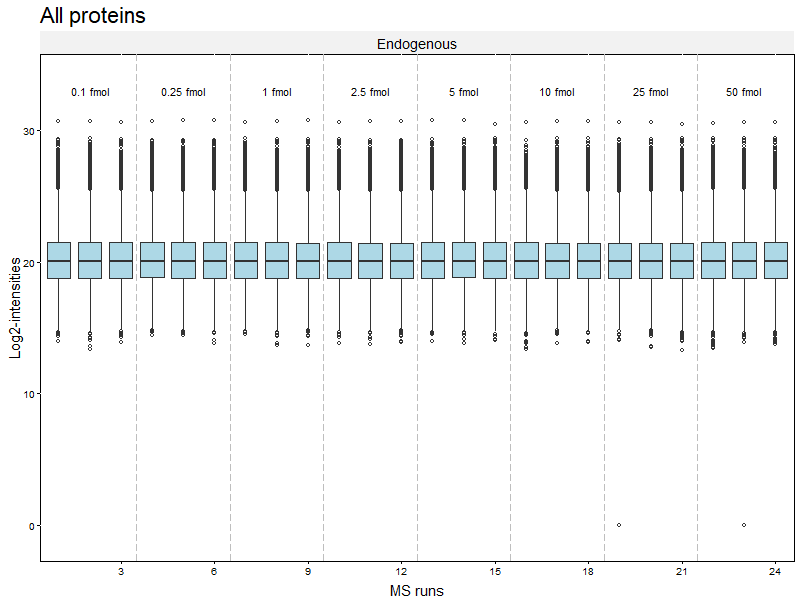

In [41]:
%%R -w 800 -h 600

ordered.item <- c("0.1 fmol","0.25 fmol","1 fmol","2.5 fmol", "5 fmol", "10 fmol", "25 fmol", "50 fmol")
ordered.item <- factor(1:length(ordered.item),labels = ordered.item)
quantms.proposed$ProteinLevelData$GROUP<-factor(quantms.proposed$ProteinLevelData$GROUP,levels = levels(ordered.item))
quantms.proposed$FeatureLevelData$GROUP<-factor(quantms.proposed$FeatureLevelData$GROUP,levels = levels(ordered.item))


dataProcessPlots(data = quantms.proposed, type="QCPlot",which.Protein="allonly",width=10, height=5, address=FALSE)

In [42]:
%%R

ac_groups = levels(quantms.proposed$FeatureLevelData$GROUP)
groups = levels(quantms.proposed$ProteinLevelData$GROUP)
print(groups)
comparison_matrix = c(0,0,0,0,0,0,-1,0,0,0,0,0,-1,0,0,0,0,-1,0,0,0,-1,0,0,-1,0,-1,-1,
                      0,0,0,0,0,-1,0,0,0,0,0,-1,0,0,0,0,-1,0,0,0,-1,0,0,-1,0,-1,0,1,
                      0,0,0,0,-1,0,0,0,0,0,-1,0,0,0,0,-1,0,0,0,-1,0,0,-1,0,0,1,1,0,
                      0,0,0,-1,0,0,0,0,0,-1,0,0,0,0,-1,0,0,0,-1,0,0,0,1,1,1,0,0,0,
                      0,0,-1,0,0,0,0,0,-1,0,0,0,0,-1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,
                      0,-1,0,0,0,0,0,-1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,
                      -1,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                      1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
                     )

print(length(comparison_matrix))
comparison <- matrix(comparison_matrix, nrow=28)
colnames(comparison) <- groups[order(as.numeric(groups))]
row.names(comparison) <- c("50vs25", "50vs10", "50vs5","50vs2.5","50vs1", "50vs0.25", "50vs0.1","25vs10", 
                          "25vs5", "25vs2.5", "25vs1", "25vs0.25", "25vs0.1", "10vs5", "10vs2.5",
                          "10vs1", "10vs0.25", "10vs0.1", "5vs2.5", "5vs1", "5vs0.25",
                          "5vs0.1", "2.5vs1", "2.5vs0.25", "2.5vs0.1", "1vs0.25",
                          "1vs0.1", "0.25vs0.1")

ResultComparison <- groupComparison(contrast.matrix=comparison, data=quantms.proposed)
head(ResultComparison$ComparisonResult)
write.csv(ResultComparison$ComparisonResult, 'Wide/wide_comparison_res.csv', row.names=FALSE,col.names=TRUE,sep=",")

[1] "0.1 fmol"  "0.25 fmol" "1 fmol"    "2.5 fmol"  "5 fmol"    "10 fmol"  
[7] "25 fmol"   "50 fmol"  
[1] 224
INFO  [2022-08-15 15:10:56]  == Start to test and get inference in whole plot ...
  |======================================================================| 100%
INFO  [2022-08-15 15:11:25]  == Comparisons for all proteins are done.


### Mixed

In [43]:
%%R -w 800 -h 600

raw.om <- read.csv('Mixed/PXD026600Mixed.sdrf_openms_design_msstats_in.csv', header = TRUE, sep = ',')

raw.om$Condition <- sub("Mixed\\|CT=Mixture;CN=UPS1;QY=", "", raw.om$Condition)

raw.om <- OpenMStoMSstatsFormat(raw.om)
# If run dataProcess() occuring an error message, please change "summaryMethod = 'TMP'" to "summaryMethod = 'linear'"
quantms.proposed <- MSstats::dataProcess(raw = raw.om,
                                           normalization = 'equalizeMedians',
                                           summaryMethod = 'TMP',
                                           censoredInt = "NA",
                                           MBimpute = TRUE)

# Write the expression protein log values into the expression csv 
head(quantms.proposed$ProteinLevelData)
Protein.Expression <- quantms.proposed$ProteinLevelData[, c('Protein', 'LogIntensities', 'GROUP')]

INFO  [2022-08-15 15:12:06] ** Raw data from OpenMS imported successfully.
INFO  [2022-08-15 15:12:07] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-08-15 15:12:07] ** Using annotation extracted from quantification data.
INFO  [2022-08-15 15:12:07] ** Run labels were standardized to remove symbols such as '.' or '%'.
INFO  [2022-08-15 15:12:07] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge, FragmentIon, ProductCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements across runs will be removed.
INFO  [2022-08-15 15:12:07] ** Features with all missing measurements across runs are removed.
INFO  [2022-08-15 15:12:07] ** Shared peptides are removed.
INFO  [2022-08-15 15:12:08] ** Multiple measurements in a feature and a run are summarized by summaryforMultipleRows: max
INFO  [2022-08-15 15:12:08] ** Features with one or two meas

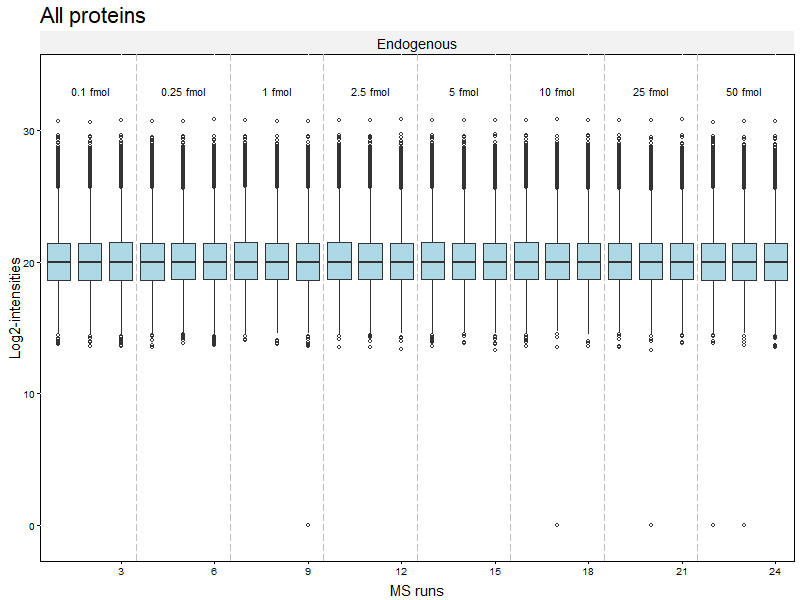

In [45]:
%%R -w 800 -h 600

ordered.item <- c("0.1 fmol","0.25 fmol","1 fmol","2.5 fmol", "5 fmol", "10 fmol", "25 fmol", "50 fmol")
ordered.item <- factor(1:length(ordered.item),labels = ordered.item)
quantms.proposed$ProteinLevelData$GROUP<-factor(quantms.proposed$ProteinLevelData$GROUP,levels = levels(ordered.item))
quantms.proposed$FeatureLevelData$GROUP<-factor(quantms.proposed$FeatureLevelData$GROUP,levels = levels(ordered.item))

dataProcessPlots(data = quantms.proposed, type="QCPlot",which.Protein="allonly",width=10, height=5, address=FALSE)

In [46]:
%%R

ac_groups = levels(quantms.proposed$FeatureLevelData$GROUP)
groups = levels(quantms.proposed$ProteinLevelData$GROUP)
print(groups)
comparison_matrix = c(0,0,0,0,0,0,-1,0,0,0,0,0,-1,0,0,0,0,-1,0,0,0,-1,0,0,-1,0,-1,-1,
                      0,0,0,0,0,-1,0,0,0,0,0,-1,0,0,0,0,-1,0,0,0,-1,0,0,-1,0,-1,0,1,
                      0,0,0,0,-1,0,0,0,0,0,-1,0,0,0,0,-1,0,0,0,-1,0,0,-1,0,0,1,1,0,
                      0,0,0,-1,0,0,0,0,0,-1,0,0,0,0,-1,0,0,0,-1,0,0,0,1,1,1,0,0,0,
                      0,0,-1,0,0,0,0,0,-1,0,0,0,0,-1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,
                      0,-1,0,0,0,0,0,-1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,
                      -1,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                      1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
                     )

print(length(comparison_matrix))
comparison <- matrix(comparison_matrix, nrow=28)
colnames(comparison) <- groups[order(as.numeric(groups))]
row.names(comparison) <- c("50vs25", "50vs10", "50vs5","50vs2.5","50vs1", "50vs0.25", "50vs0.1","25vs10", 
                          "25vs5", "25vs2.5", "25vs1", "25vs0.25", "25vs0.1", "10vs5", "10vs2.5",
                          "10vs1", "10vs0.25", "10vs0.1", "5vs2.5", "5vs1", "5vs0.25",
                          "5vs0.1", "2.5vs1", "2.5vs0.25", "2.5vs0.1", "1vs0.25",
                          "1vs0.1", "0.25vs0.1")

ResultComparison <- groupComparison(contrast.matrix=comparison, data=quantms.proposed)
head(ResultComparison$ComparisonResult)
write.csv(ResultComparison$ComparisonResult, 'Mixed/mixed_comparison_res.csv', row.names=FALSE,col.names=TRUE,sep=",")

[1] "0.1 fmol"  "0.25 fmol" "1 fmol"    "2.5 fmol"  "5 fmol"    "10 fmol"  
[7] "25 fmol"   "50 fmol"  
[1] 224
INFO  [2022-08-15 15:19:22]  == Start to test and get inference in whole plot ...
  |======================================================================| 100%
INFO  [2022-08-15 15:19:54]  == Comparisons for all proteins are done.


### Overlap

In [47]:
%%R

raw.om <- read.csv('Overlap/PXD026600Overlap.sdrf_openms_design_msstats_in.csv', header = TRUE, sep = ',')
raw.om$Condition <- sub("Overlap\\|CT=Mixture;CN=UPS1;QY=", "", raw.om$Condition)

raw.om <- OpenMStoMSstatsFormat(raw.om)
# If run dataProcess() occuring an error message, please change "summaryMethod = 'TMP'" to "summaryMethod = 'linear'"
quantms.proposed <- MSstats::dataProcess(raw = raw.om,
                                           normalization = 'equalizeMedians',
                                           summaryMethod = 'TMP',
                                           censoredInt = "NA",
                                           MBimpute = TRUE)

# Write the expression protein log values into the expression csv 
head(quantms.proposed$ProteinLevelData)
Protein.Expression <- quantms.proposed$ProteinLevelData[, c('Protein', 'LogIntensities', 'GROUP')]

INFO  [2022-08-15 15:20:22] ** Raw data from OpenMS imported successfully.
INFO  [2022-08-15 15:20:23] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-08-15 15:20:23] ** Using annotation extracted from quantification data.
INFO  [2022-08-15 15:20:23] ** Run labels were standardized to remove symbols such as '.' or '%'.
INFO  [2022-08-15 15:20:23] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge, FragmentIon, ProductCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements across runs will be removed.
INFO  [2022-08-15 15:20:23] ** Features with all missing measurements across runs are removed.
INFO  [2022-08-15 15:20:23] ** Shared peptides are removed.
INFO  [2022-08-15 15:20:24] ** Multiple measurements in a feature and a run are summarized by summaryforMultipleRows: max
INFO  [2022-08-15 15:20:24] ** Features with one or two meas

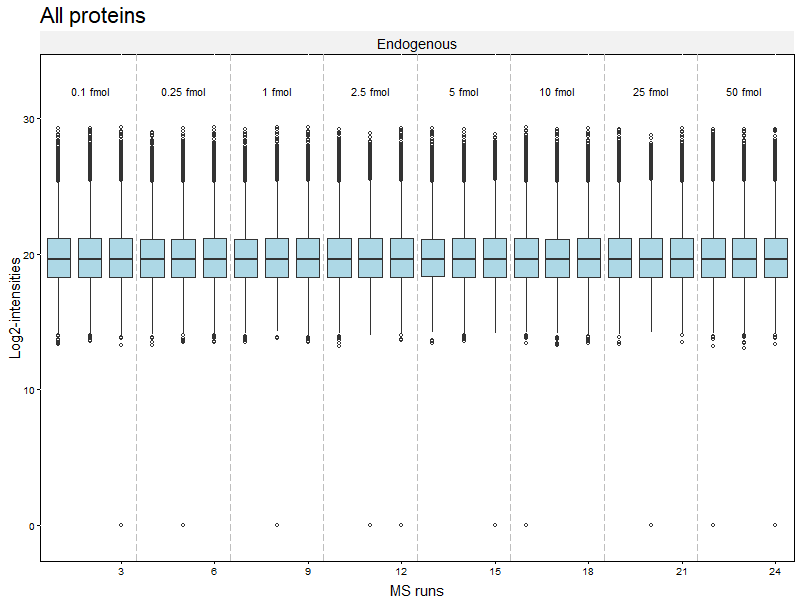

In [49]:
%%R -w 800 -h 600

ordered.item <- c("0.1 fmol","0.25 fmol","1 fmol","2.5 fmol", "5 fmol", "10 fmol", "25 fmol", "50 fmol")
ordered.item <- factor(1:length(ordered.item),labels = ordered.item)
quantms.proposed$ProteinLevelData$GROUP<-factor(quantms.proposed$ProteinLevelData$GROUP,levels = levels(ordered.item))
quantms.proposed$FeatureLevelData$GROUP<-factor(quantms.proposed$FeatureLevelData$GROUP,levels = levels(ordered.item))

dataProcessPlots(data = quantms.proposed, type="QCPlot",which.Protein="allonly",width=10, height=5, address=FALSE)

In [50]:
%%R

ac_groups = levels(quantms.proposed$FeatureLevelData$GROUP)
groups = levels(quantms.proposed$ProteinLevelData$GROUP)
print(groups)
comparison_matrix = c(0,0,0,0,0,0,-1,0,0,0,0,0,-1,0,0,0,0,-1,0,0,0,-1,0,0,-1,0,-1,-1,
                      0,0,0,0,0,-1,0,0,0,0,0,-1,0,0,0,0,-1,0,0,0,-1,0,0,-1,0,-1,0,1,
                      0,0,0,0,-1,0,0,0,0,0,-1,0,0,0,0,-1,0,0,0,-1,0,0,-1,0,0,1,1,0,
                      0,0,0,-1,0,0,0,0,0,-1,0,0,0,0,-1,0,0,0,-1,0,0,0,1,1,1,0,0,0,
                      0,0,-1,0,0,0,0,0,-1,0,0,0,0,-1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,
                      0,-1,0,0,0,0,0,-1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,
                      -1,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                      1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
                     )

print(length(comparison_matrix))
comparison <- matrix(comparison_matrix, nrow=28)
colnames(comparison) <- groups[order(as.numeric(groups))]
row.names(comparison) <- c("50vs25", "50vs10", "50vs5","50vs2.5","50vs1", "50vs0.25", "50vs0.1","25vs10", 
                          "25vs5", "25vs2.5", "25vs1", "25vs0.25", "25vs0.1", "10vs5", "10vs2.5",
                          "10vs1", "10vs0.25", "10vs0.1", "5vs2.5", "5vs1", "5vs0.25",
                          "5vs0.1", "2.5vs1", "2.5vs0.25", "2.5vs0.1", "1vs0.25",
                          "1vs0.1", "0.25vs0.1")

ResultComparison <- groupComparison(contrast.matrix=comparison, data=quantms.proposed)
head(ResultComparison$ComparisonResult)
write.csv(ResultComparison$ComparisonResult, 'Overlap/overlap_comparison_res.csv', row.names=FALSE,col.names=TRUE,sep=",")

[1] "0.1 fmol"  "0.25 fmol" "1 fmol"    "2.5 fmol"  "5 fmol"    "10 fmol"  
[7] "25 fmol"   "50 fmol"  
[1] 224
INFO  [2022-08-15 15:23:09]  == Start to test and get inference in whole plot ...
  |======================================================================| 100%
INFO  [2022-08-15 15:23:41]  == Comparisons for all proteins are done.


### Accurancy: MAPE

#### MAPE (Mean absolute percentage error) of detected UPS1 protein concentrations relative to the corresponding know concentrations for 36 paired comparisions. MAPE(%) = 1/N * (expected FC - experimental FC / expected FC) * 100. N=number of UPS1 quantified proteins

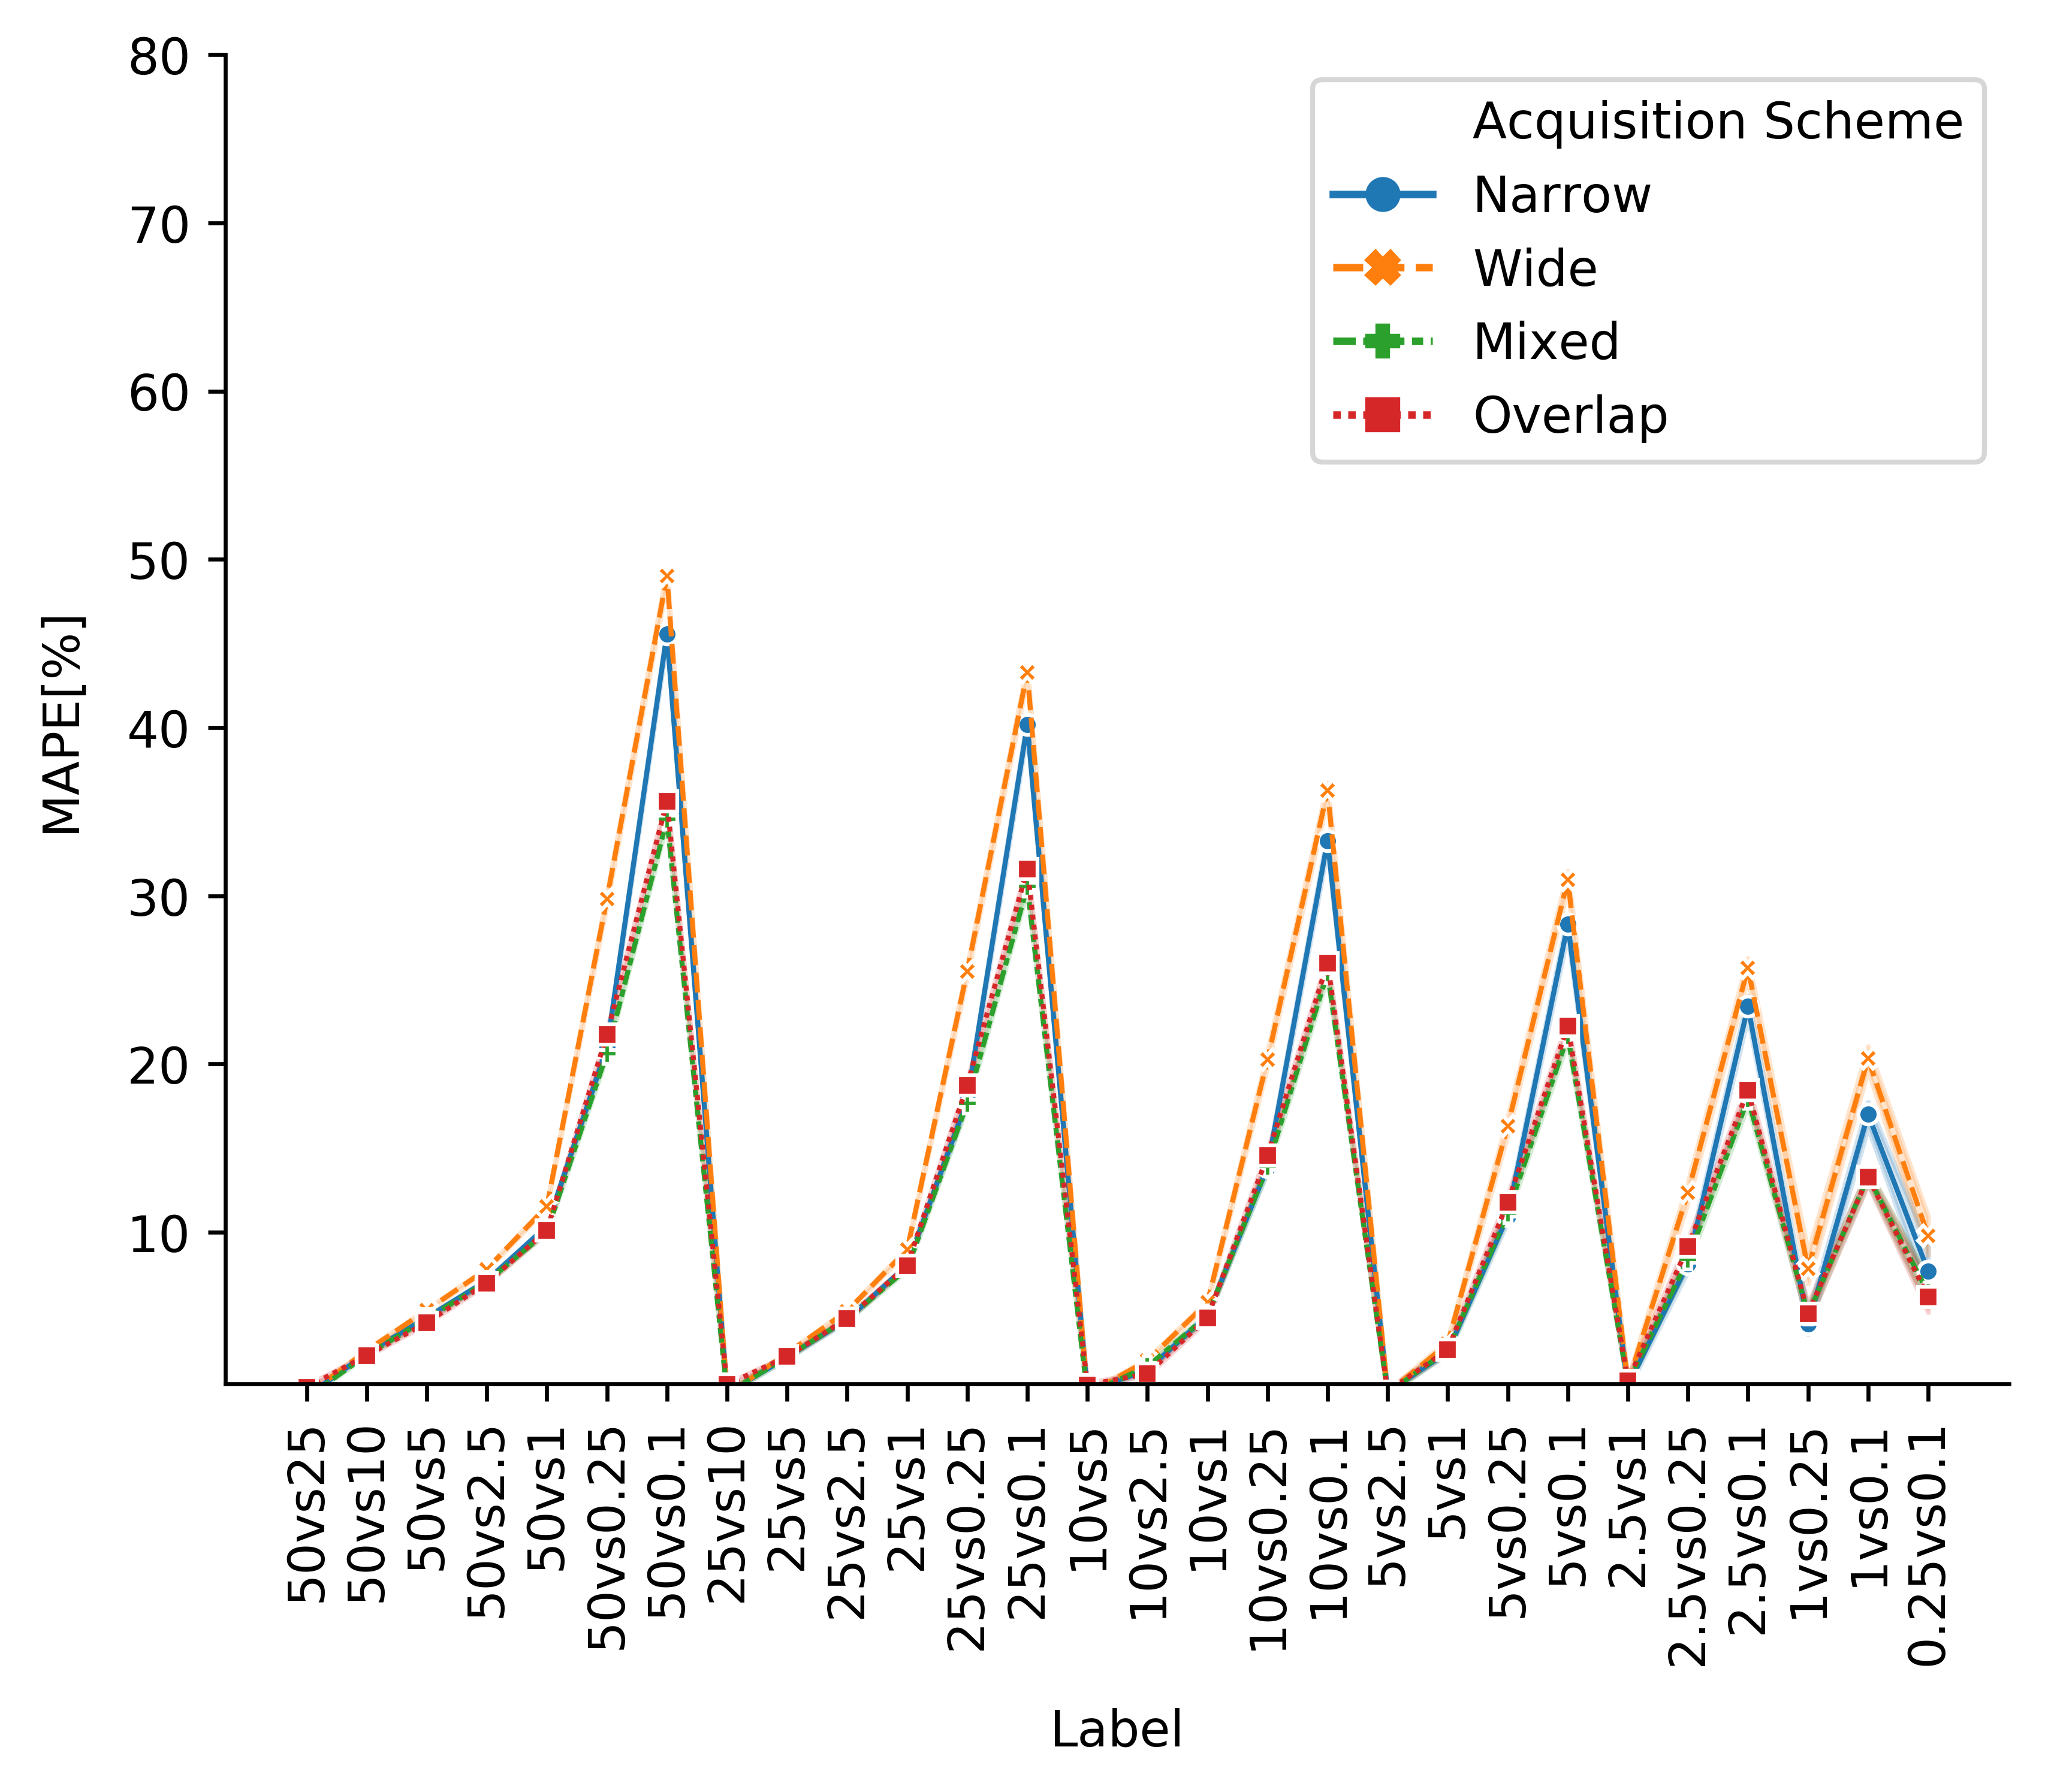

In [87]:
import numpy as np

mape_data = pd.DataFrame()

narrow_comparison_res = pd.read_csv("Narrow/narrow_comparison_res.csv")
narrow_comparison_res["Acquisition Scheme"] = "Narrow"
wide_comparison_res = pd.read_csv("Wide/wide_comparison_res.csv")
wide_comparison_res["Acquisition Scheme"] = "Wide"
overlap_comparison_res = pd.read_csv("Overlap/overlap_comparison_res.csv")
overlap_comparison_res["Acquisition Scheme"] = "Overlap"
mixed_comparison_res = pd.read_csv("Mixed/mixed_comparison_res.csv")
mixed_comparison_res["Acquisition Scheme"] = "Mixed"

mape_data = pd.concat([narrow_comparison_res, wide_comparison_res, overlap_comparison_res, mixed_comparison_res])
mape_data = mape_data[["Protein", "Label", "Acquisition Scheme", "log2FC", "pvalue", "adj.pvalue"]].dropna()

mape_ups_data = mape_data[mape_data["Protein"].str.contains("UPS")]
mape_ups_nrow = mape_ups_data.groupby(["Acquisition Scheme", "Label"], as_index=False).size()
mape_ups_data = pd.merge(mape_ups_data, mape_ups_nrow, on=["Acquisition Scheme", "Label"], how="inner")
mape_ups_data.head()

def cal_mape(row):
    expected_FC = np.log2(float(row["Label"].split("vs")[0]) / float(row["Label"].split("vs")[1]))
    mape = np.abs(expected_FC - row["log2FC"] / expected_FC) / row["size"] * 100
    
    return mape

mape_ups_data["MAPE[%]"] = mape_ups_data.apply(lambda row: cal_mape(row), axis=1)

plt.figure(dpi=600)
plt.style.use('default')
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


comparison_order = CategoricalDtype(
    ["50vs25", "50vs10", "50vs5","50vs2.5","50vs1", "50vs0.25", "50vs0.1","25vs10", 
                          "25vs5", "25vs2.5", "25vs1", "25vs0.25", "25vs0.1", "10vs5", "10vs2.5",
                          "10vs1", "10vs0.25", "10vs0.1", "5vs2.5", "5vs1", "5vs0.25",
                          "5vs0.1", "2.5vs1", "2.5vs0.25", "2.5vs0.1", "1vs0.25",
                          "1vs0.1", "0.25vs0.1"], 
    ordered=True
)


mape_ups_data['Label'] = mape_ups_data['Label'].astype(comparison_order)
plt.xlabel("Label",labelpad=8.5)
plt.ylabel("MAPE[%]", labelpad=8.5)
plt.xticks(rotation=90)
plt.ylim(1, 80)
sb.lineplot(x="Label", y="MAPE[%]", hue="Acquisition Scheme",style="Acquisition Scheme", markers=True,data=mape_ups_data, hue_order=["Narrow", "Wide", "Mixed", "Overlap"], linewidth = 1, markersize=4)



In [68]:
mape_ups_data.head()

,Protein,Label,Acquisition Scheme,log2FC,pvalue,adj.pvalue,size,MAPE[%]
0,O00762ups|UBE2C_HUMAN_UPS,50vs25,Narrow,1.031468,1.839343e-06,0.000118,45,0.069930
1,O76070ups|SYUG_HUMAN_UPS,50vs25,Narrow,1.043911,3.289874e-05,0.000538,45,0.097579
2,P00167ups|CYB5_HUMAN_UPS,50vs25,Narrow,0.908179,1.707715e-07,0.000027,45,0.204046
3,P00441ups|SODC_HUMAN_UPS,50vs25,Narrow,0.867459,5.455295e-03,0.019250,45,0.294536
4,P00709ups|LALBA_HUMAN_UPS,50vs25,Narrow,1.141583,4.746604e-06,0.000185,45,0.314628


### Sensitivity: AUC

    Acquisition Scheme      Label       AUC
0                Mixed  0.25vs0.1  0.586702
1               Narrow  0.25vs0.1  0.554805
2              Overlap  0.25vs0.1  0.497262
3                 Wide  0.25vs0.1  0.512286
4                Mixed    10vs0.1  0.999615
..                 ...        ...       ...
107               Wide       5vs1  0.998377
108              Mixed     5vs2.5  0.993695
109             Narrow     5vs2.5  0.989959
110            Overlap     5vs2.5  0.931829
111               Wide     5vs2.5  0.981626

[112 rows x 3 columns]


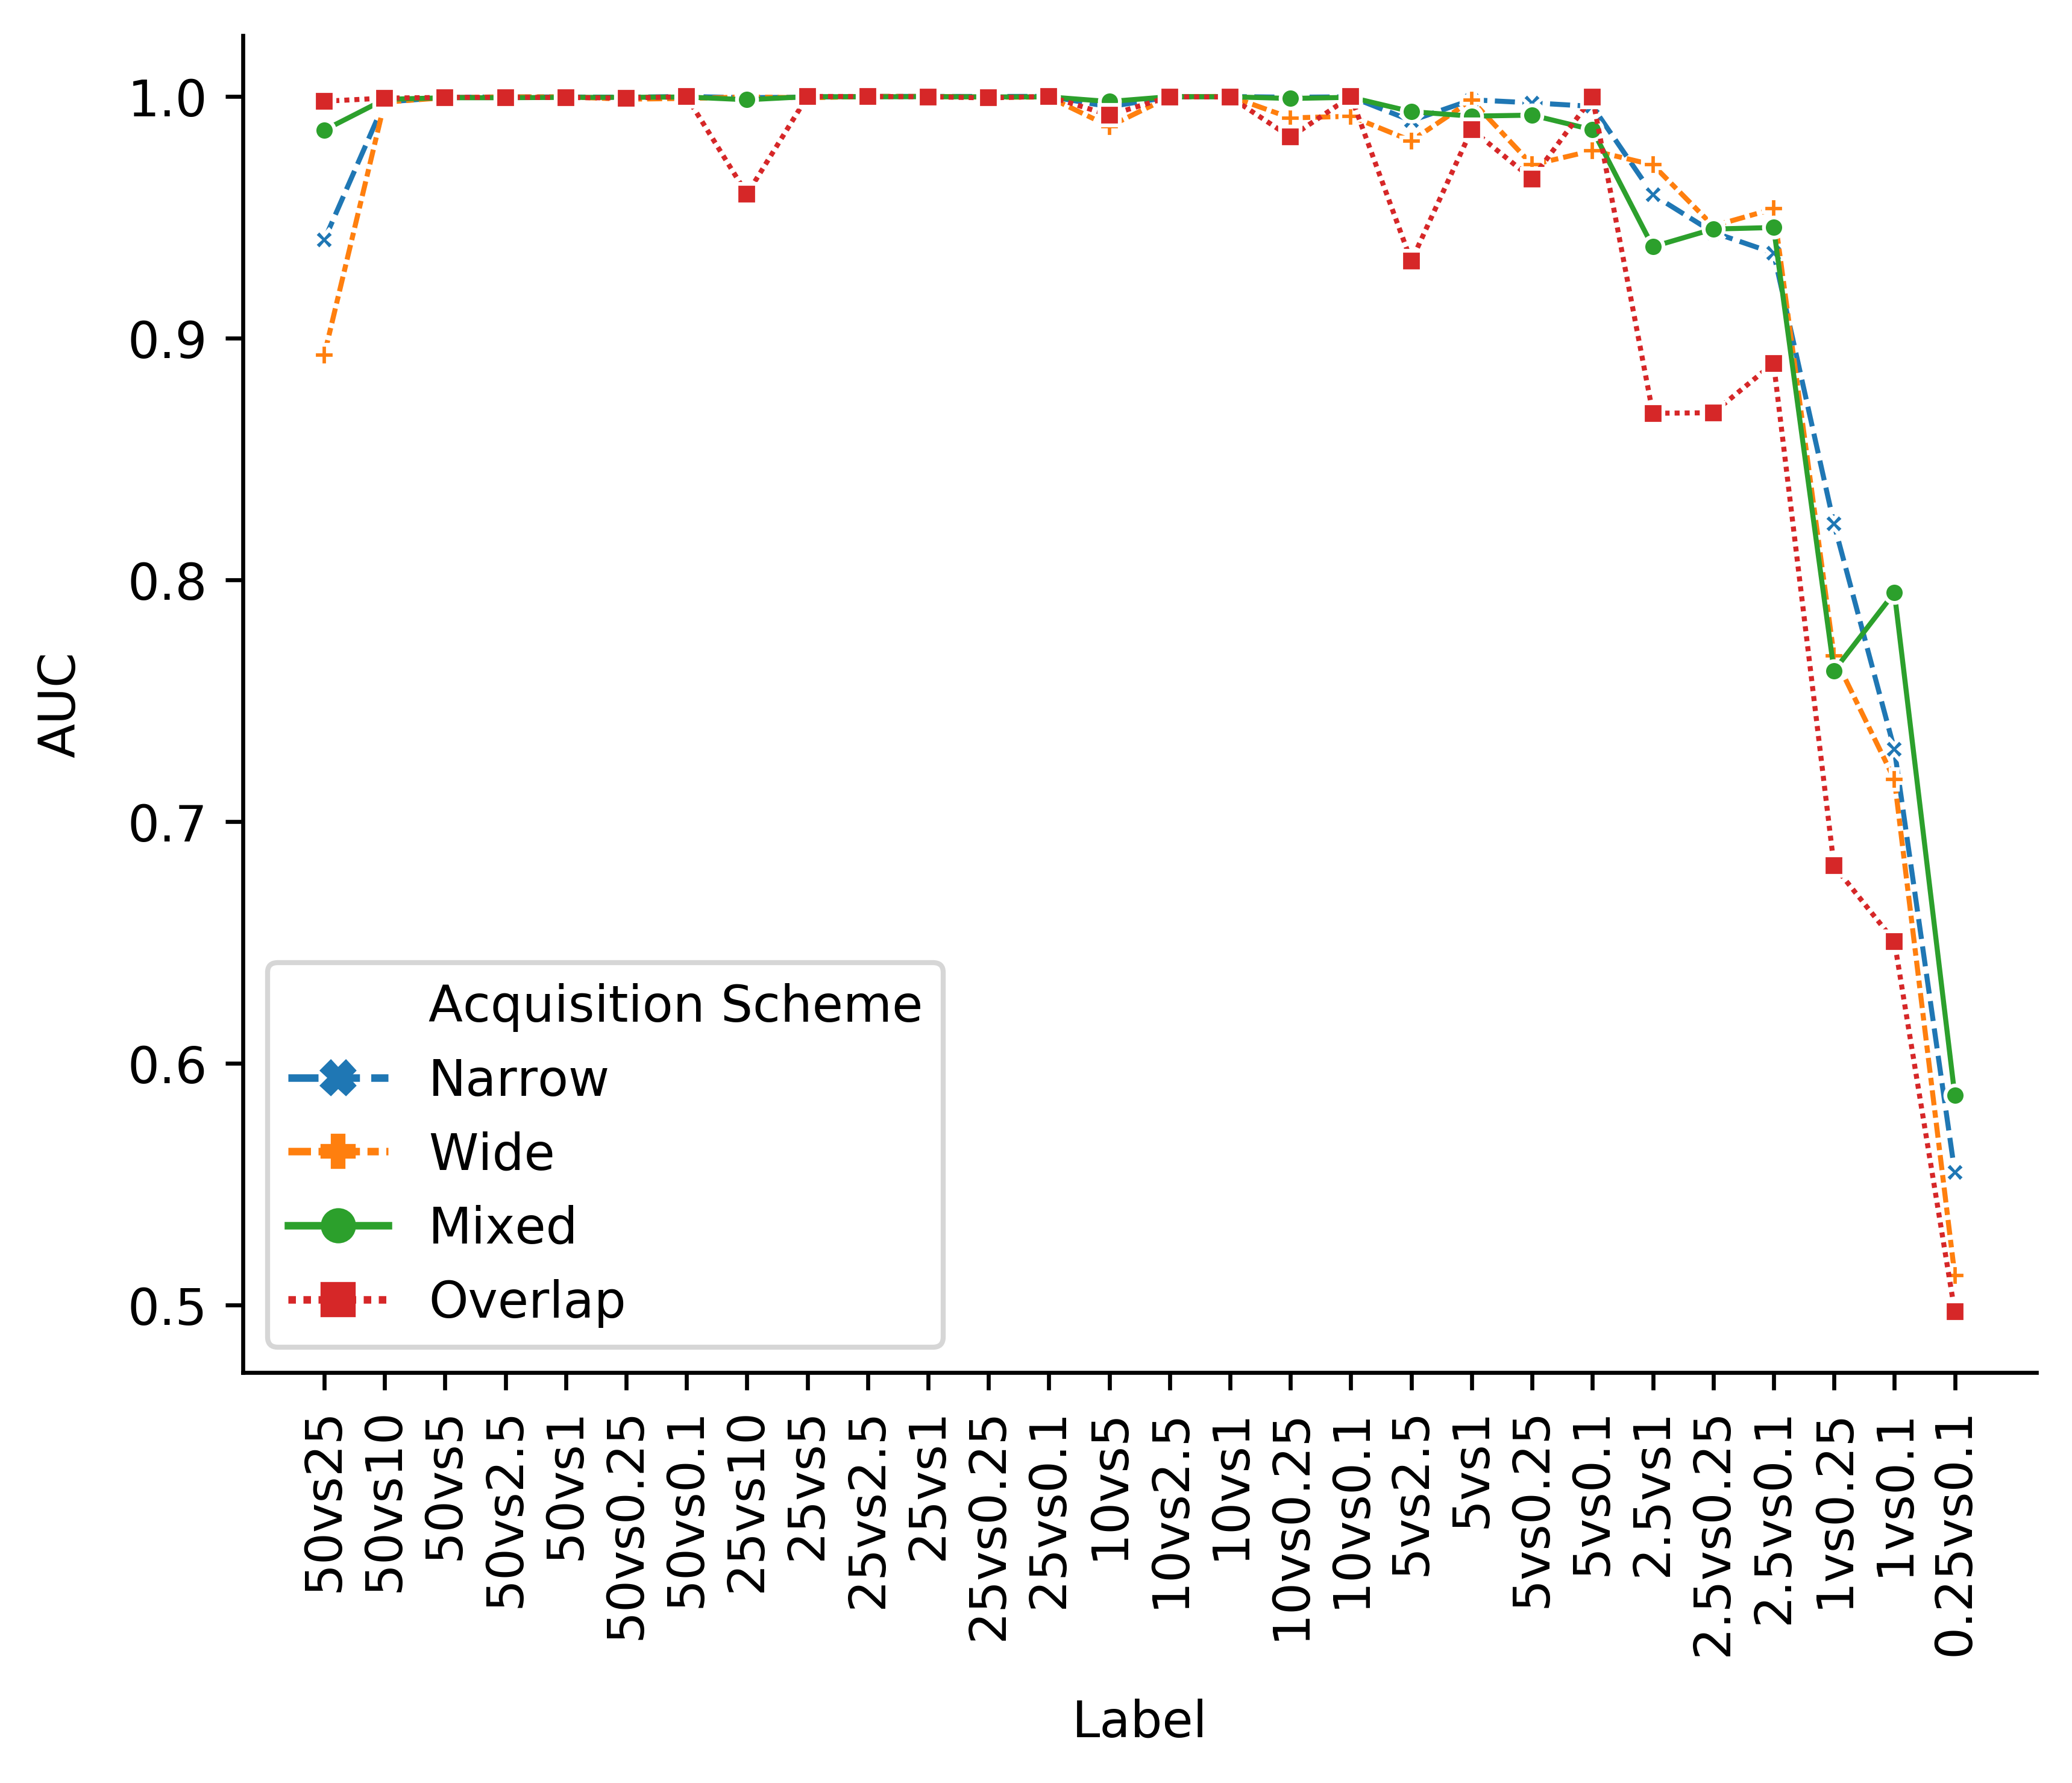

In [97]:
from sklearn import metrics

auc_df = pd.DataFrame()
for names, group in mape_data.groupby(["Label", "Acquisition Scheme"]):
    group['value'] = 1 - group['adj.pvalue']
    group['y'] = group['Protein'].map(lambda x: ("UPS" in x and 1) or ("UPS" not in x and 0))
    group = group.sort_values(by="value", ascending=False)
    fpr, tpr, thresholds = metrics.roc_curve(group['y'].tolist(), group['value'].tolist(), pos_label = 1)
    auc = metrics.auc(fpr, tpr)
    auc_df = auc_df.append({"Acquisition Scheme": names[1], "Label": names[0], "AUC": auc}, ignore_index=True)

print(auc_df)

plt.figure(dpi=600)
plt.style.use('default')
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

auc_df['Label'] = auc_df['Label'].astype(comparison_order)
plt.xlabel("Label",labelpad=8.5)
plt.ylabel("AUC", labelpad=8.5)
plt.xticks(rotation=90)
sb.lineplot(x="Label", y="AUC", hue="Acquisition Scheme",style="Acquisition Scheme", markers=True,data=auc_df, hue_order=["Narrow", "Wide", "Mixed", "Overlap"], linewidth = 1, markersize=4)

